In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data

In [5]:
hospital_df = pd.read_csv('hospital_kpi_sample.csv')

In [9]:
hospital_df.head()

,HospitalID,HospitalName,AvgWaitTimeMins,ReadmissionRate,TreatmentSuccessRate,BedOccupancyRate,AvgStayDays,StaffUtilizationRate
0,1066,CityCare,15.4,0.11,0.92,0.69,2.8,0.65
1,1092,LifeLine,34.7,0.08,0.80,0.83,2.8,0.74
2,1098,CurePoint,61.1,0.11,0.80,0.73,3.6,0.91
3,1017,HealthFirst,66.7,0.08,0.97,0.71,4.1,0.91
4,1083,LifeLine,38.8,0.20,0.74,0.95,3.6,0.75


In [13]:
hospital_df.tail()

,HospitalID,HospitalName,AvgWaitTimeMins,ReadmissionRate,TreatmentSuccessRate,BedOccupancyRate,AvgStayDays,StaffUtilizationRate
495,1024,CityCare,44.7,0.21,0.91,0.90,6.2,0.68
496,1038,LifeLine,20.8,0.17,0.75,0.58,3.9,0.81
497,1079,HealthFirst,60.2,0.24,0.79,1.00,5.3,0.80
498,1074,MediPlus,60.1,0.25,0.81,0.77,3.8,0.72
499,1024,CityCare,64.3,0.13,0.81,0.87,8.7,0.82


In [21]:
#Basic Data Inspection

In [33]:
hospital_df.info()

#shape
print(f"shpe : {hospital_df.shape}")
print("Missing values \n:",hospital_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HospitalID            500 non-null    int64  
 1   HospitalName          500 non-null    object 
 2   AvgWaitTimeMins       500 non-null    float64
 3   ReadmissionRate       500 non-null    float64
 4   TreatmentSuccessRate  500 non-null    float64
 5   BedOccupancyRate      500 non-null    float64
 6   AvgStayDays           500 non-null    float64
 7   StaffUtilizationRate  500 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 31.4+ KB
shpe : (500, 8)
Missing values 
: HospitalID              0
HospitalName            0
AvgWaitTimeMins         0
ReadmissionRate         0
TreatmentSuccessRate    0
BedOccupancyRate        0
AvgStayDays             0
StaffUtilizationRate    0
dtype: int64


In [45]:
#describe 
hospital_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HospitalID,500.0,1051.15200,30.234967,1000.00,1025.000,1052.00,1078.000,1099.00
AvgWaitTimeMins,500.0,44.72480,15.723575,-3.80,34.225,44.60,55.900,85.90
ReadmissionRate,500.0,0.17570,0.074250,0.05,0.110,0.17,0.240,0.30
TreatmentSuccessRate,500.0,0.84232,0.081276,0.70,0.770,0.84,0.910,0.98
BedOccupancyRate,500.0,0.75102,0.144987,0.50,0.630,0.75,0.870,1.00
AvgStayDays,500.0,4.47940,1.503808,-1.00,3.400,4.50,5.425,8.70
StaffUtilizationRate,500.0,0.78162,0.100378,0.60,0.700,0.78,0.870,0.95


In [39]:
#hospital count
hospital_df['HospitalName'].value_counts()

HospitalName
CurePoint      110
CityCare       109
LifeLine        99
MediPlus        97
HealthFirst     85
Name: count, dtype: int64

In [ ]:
#Visualize Individual KPIs

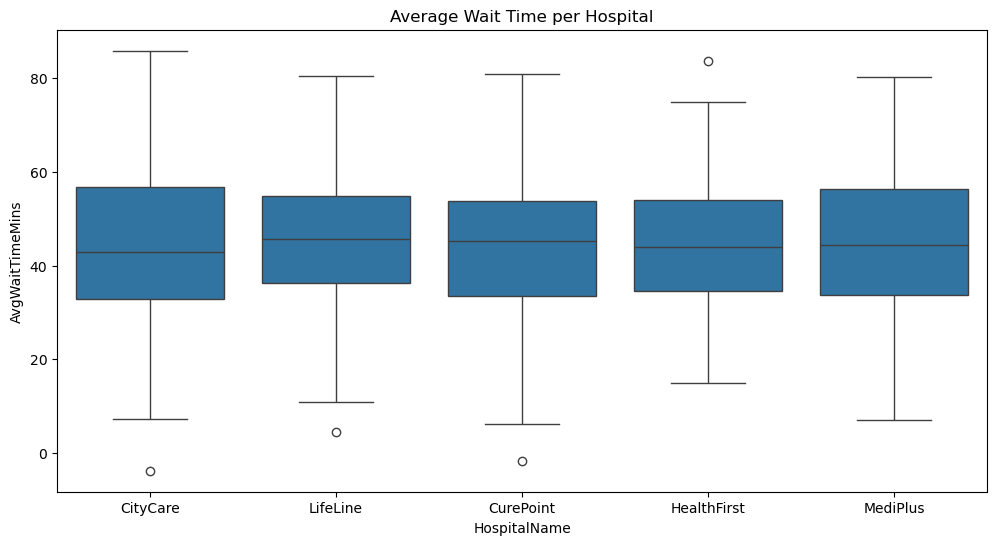

In [47]:
#Average Wait Time per Hospital
plt.figure(figsize=(12, 6))
sns.boxplot(data=hospital_df, x='HospitalName', y='AvgWaitTimeMins')
plt.title('Average Wait Time per Hospital')
plt.show()

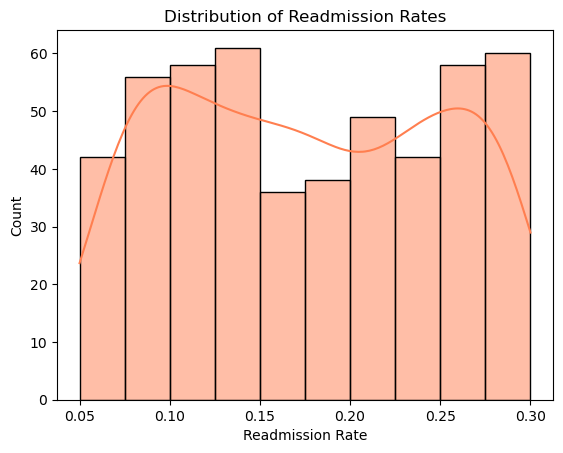

In [51]:
#Readmission Rate Distribution
sns.histplot(hospital_df['ReadmissionRate'], kde=True, color='coral')
plt.title('Distribution of Readmission Rates')
plt.xlabel('Readmission Rate')
plt.show()

In [55]:
#Correlation Heatmap 

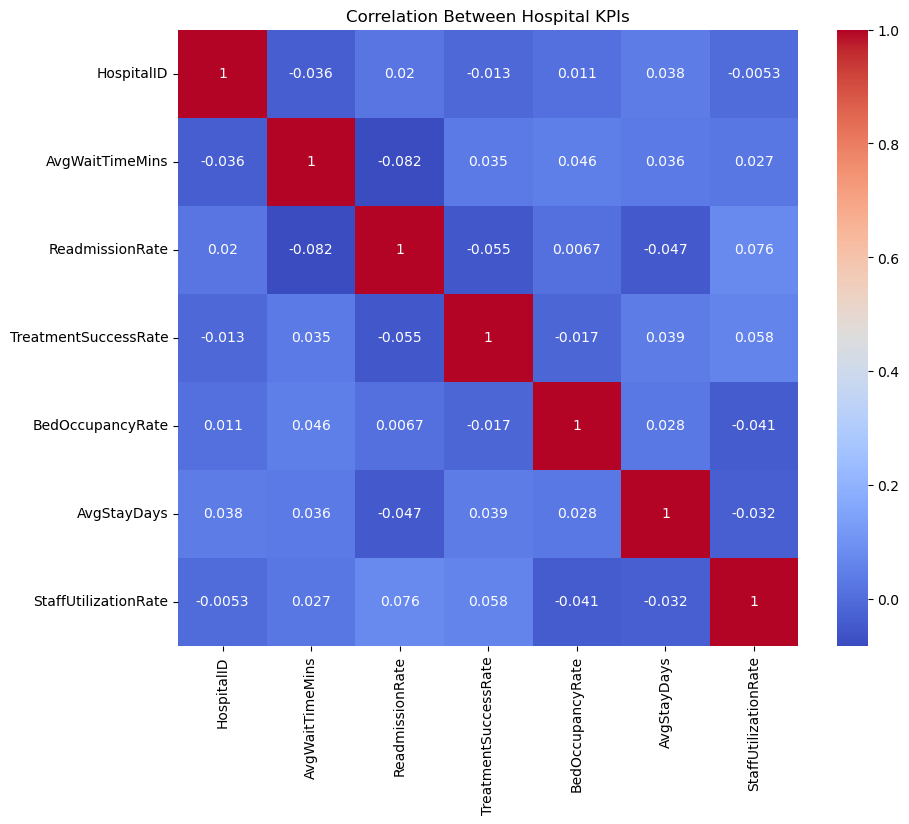

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(metrics.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Hospital KPIs')
plt.show()


In [67]:
#group by Hospital for Insights

In [79]:
kpi_summary = hospital_df.groupby('HospitalName').mean()[[
    'AvgWaitTimeMins', 'ReadmissionRate', 'TreatmentSuccessRate',
    'BedOccupancyRate', 'AvgStayDays', 'StaffUtilizationRate'
]]
kpi_summary.sort_values('ReadmissionRate', ascending=False)

#curepoint hospital has the highest readmissions
#curepoint hospital has most sucessful hospital becuase it have lowwaitTime and high treatment succesrate

,AvgWaitTimeMins,ReadmissionRate,TreatmentSuccessRate,BedOccupancyRate,AvgStayDays,StaffUtilizationRate
HospitalName,,,,,,
CurePoint,43.711818,0.182545,0.855727,0.741545,4.556364,0.791364
HealthFirst,44.980000,0.178588,0.834235,0.756941,4.636471,0.777059
LifeLine,46.048485,0.173333,0.834343,0.744141,4.405051,0.778283
CityCare,44.422936,0.172844,0.831468,0.755229,4.254128,0.791193
MediPlus,44.638144,0.171031,0.854536,0.758866,4.583505,0.767216


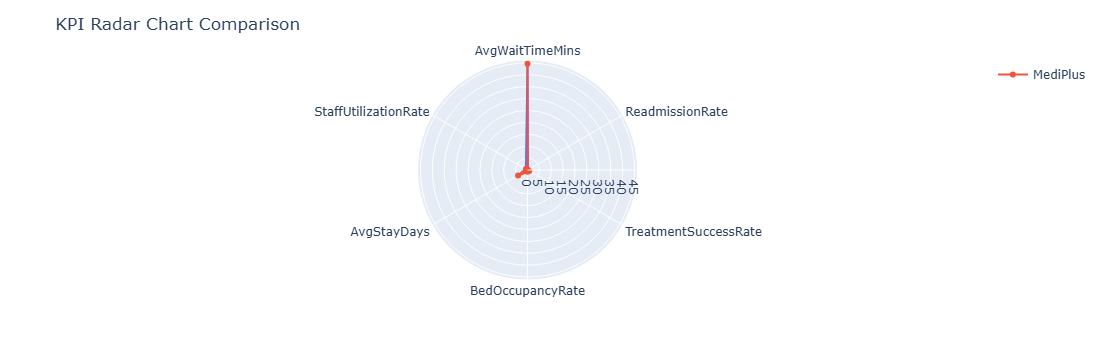

In [82]:
#KPI Ranking Dashboard 
import plotly.express as px

sample = hospital_df[hospital_df['HospitalName'] == 'CityCare'].mean(numeric_only=True)
sample2 = hospital_df[hospital_df['HospitalName'] == 'MediPlus'].mean(numeric_only=True)

df_plot = pd.DataFrame({
    'Metric': sample.index,
    'CityCare': sample.values,
    'MediPlus': sample2.values
})
df_plot = df_plot[df_plot['Metric'].isin([
    'AvgWaitTimeMins', 'ReadmissionRate', 'TreatmentSuccessRate',
    'BedOccupancyRate', 'AvgStayDays', 'StaffUtilizationRate'
])]

fig = px.line_polar(df_plot, r='CityCare', theta='Metric', line_close=True)
fig.add_scatterpolar(r=df_plot['MediPlus'], theta=df_plot['Metric'], name='MediPlus')
fig.update_layout(title='KPI Radar Chart Comparison')
fig.show()

In [86]:
#Which hospital has the best treatment success rate?

best_success = hospital_df.groupby('HospitalName')['TreatmentSuccessRate'].mean().sort_values(ascending=False)
print(best_success)

HospitalName
CurePoint      0.855727
MediPlus       0.854536
LifeLine       0.834343
HealthFirst    0.834235
CityCare       0.831468
Name: TreatmentSuccessRate, dtype: float64


In [92]:
#Who has the shortest average wait times?

shortest_wait = hospital_df.groupby('HospitalName')['AvgWaitTimeMins'].mean().sort_values()
print(shortest_wait)

HospitalName
CurePoint      43.711818
CityCare       44.422936
MediPlus       44.638144
HealthFirst    44.980000
LifeLine       46.048485
Name: AvgWaitTimeMins, dtype: float64


In [98]:
#Are longer stays linked to more readmissions?

correlation = hospital_df[['AvgStayDays', 'ReadmissionRate']].corr()
print(correlation)

                 AvgStayDays  ReadmissionRate
AvgStayDays         1.000000        -0.046723
ReadmissionRate    -0.046723         1.000000


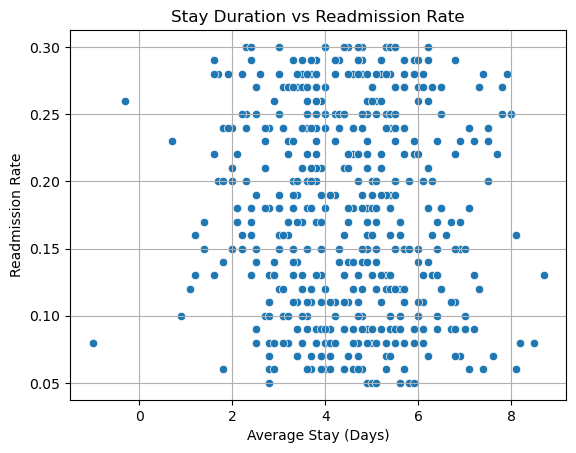

In [102]:
sns.scatterplot(data=hospital_df, x='AvgStayDays', y='ReadmissionRate')
plt.title("Stay Duration vs Readmission Rate")
plt.xlabel("Average Stay (Days)")
plt.ylabel("Readmission Rate")
plt.grid(True)
plt.show()
